<h1><b>Markov Decision Processes</h1></b>
<p align="justify">Στη συγκεκριμένη άσκηση θα μελετήσετε τους αλγορίθμους <i>Policy Iteration</i> και <i>Value Iteration</i>, καθώς και θα εξοικειωθείτε με βασικές έννοιες των <i>Markov Decision Processes</i>. Οι αλγόριθμοι <i>Policy Iteration</i> και <i>Value Iteration</i> είναι από τους βασικούς αλγορίθμους δυναμικού προγραμματισμού που χρησιμοποιούνται για την επίλυση της εξίσωσης <i>Bellman</i> σε <i>Markov Decision Processes</i>.</p>
<p align="justify">Το πρόβλημα που θα μελετήσετε είναι αυτό της παγωμένης λίμνης (Frozen Lake) με μέγεθος πλέγματος 8 x 8.</p>


<h2><b>Εξοικείωση με τη βιβλιοθήκη <i>Gym</i></b></h2>

In [ ]:
!pip install gymnasium
import numpy as np
import gymnasium as gym
from gym import wrappers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 10.8 MB/s eta 0:00:00


Με την παρακάτω εντολή, ορίζετε το πρόβλημα που θα μελετηθεί:

In [ ]:
env_name = 'FrozenLake-v1'
env = gym.make(env_name, map_name='8x8', render_mode='rgb_array')

Με τις παρακάτω εντολές, θα επαναφέρετε τον Agent στην αρχική του θέση και θα οπτικοποιήσετε το πλέγμα και τη θέση του Agent

array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
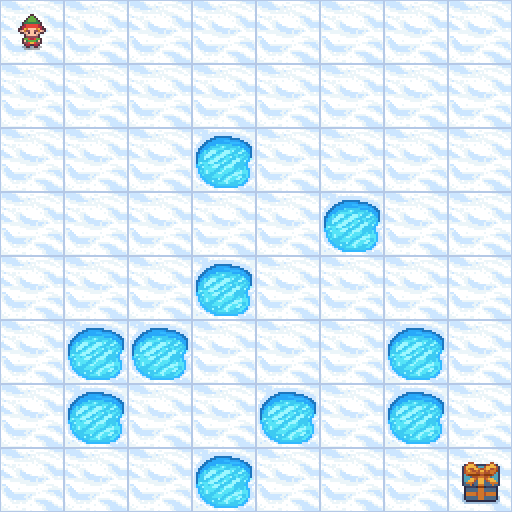

In [ ]:
env.reset()
env.render()

Με τις παρακάτω εντολές, ορίζετε την επόμενη ενέργεια με τυχαίο τρόπο και ο Agent κάνει ένα βήμα.

array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
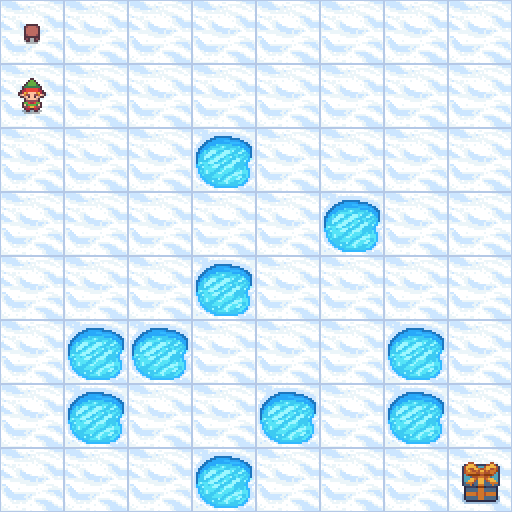

In [ ]:
next_action = env.action_space.sample()
env.step(next_action)
env.render()

Να εκτελέσετε αρκετές φορές τις τελευταίες εντολές και να παρατηρήσετε κάθε φορά την ενέργεια που ζητείται από τον agent να εκτελέσει και την ενέργεια που αυτός πραγματοποιεί. Πραγματοποιεί πάντοτε ο agent την κίνηση που του ζητείται; Είναι ντετερμινιστικές ή στοχαστικές οι κινήσεις του agent;

ΑΠΑΝΤΗΣΗ:

Εκτελώντας τις τελευταίες εντολές αρκετές φορές διαπιστώνω, ότι ο agent βρίσκεται κάθε φορά σε διαφορετική θέση-κελί. Ο agent εκτελεί διαφορετική κίνηση από αυτή που του ζητείται. Αυτό συμβαίνει διότι οι κινήσεις που κάνει ο agent είναι ντετερμινιστικές. Αυτό σημαίνει ότι έχουν προκαθορισμένη, σταθερή συμπεριφορά και δεν υπάρχει τυχαιότητα στο αποτέλεσμά τους.

<h2><b>Ερωτήσεις</b></h2>

<ul>
<li>Μελετώντας <a href="https://towardsdatascience.com/q-learning-for-beginners-2837b777741">αυτό</a> και βασισμένοι στα συμπεράσματα του προηγούμενου ερωτήματος να περιγράψετε σύντομα το πρόβλημα της παγωμένης λίμνης ως πρόβλημα βελτιστοποίησης. Ποιος είναι ο στόχος του agent;</li>
<li>Να διατυπώσετε την ιδιότητα <i>Markov</i>. Πώς απλοποιεί η ιδιότητα αυτή τη μελέτη του συγκεκριμένου προβλήματος;</li>
<li>Να περιγράψετε σύντομα τους αλγορίθμους <i>Policy Iteration</i> και <i>Value Iteration</i>, δίνοντας έμφαση στο διαφορετικό τρόπο με τον οποίο προσεγγίζουν την επίλυση του προβλήματος. Είναι εγγυημένο ότι οι δύο αλγόριθμοι θα συγκλίνουν στη βέλτιστη πολιτική; Αν ναι, οδηγούν σε ίδια ή διαφορετική βέλτιστη πολιτική;</li>
<li>Να εκτελέσετε τα προγράμματα που σας δίνονται, τα οποία επιλύουν το
πρόβλημα της παγωμένης λίμνης, χρησιμοποιώντας τους αλγορίθμους <i>Policy
Iteration</i> και <i>Value Iteration</i> αντίστοιχα. Ποια μέθοδος συγκλίνει στη βέλτιστη λύση σε λιγότερα βήματα; Τι συμπέρασμα βγάζετε; Να ελέγξετε το χρόνο εκτέλεσης του κάθε προγράμματος, χρησιμοποιώντας την εντολή <i>time</i>. Τι συμπέρασμα βγάζετε ως προς την πολυπλοκότητα του κάθε αλγορίθμου;</li>
</ul>

ΑΠΑΝΤΗΣΕΙΣ:

i) Το πρόβλημα της παγωμένης λίμνης (frozen lake) είναι ένα διαδεδομένο πρόβλημα στον τομέα της μηχανικής μάθησης και συγκεκριμένα στην εναλλακτική προσέγγιση της ενισχυτικής μάθησης. Στο πρόβλημα αυτό, ένας αλγόριθμος πρέπει να μάθει να κατευθύνει ένα παίκτη(agent) που περιπλανιέται σε μία παγωμένη λίμνη , ώστε να φτάσει από ένα αρχικό σημείο σε ένα συγκεκριμένο σημείο-στόχο, αποφεύγοντας παγίδες  στο δρόμο του.

Η κύρια πρόκληση σε αυτό το πρόβλημα είναι η εύρεση μιας στρατηγικής που θα επιτρέπει στον παίκτη (agent) να φτάσει στο στόχο του με το μεγαλύτερο πιθανό ποσοστό επιτύχιας, αποφεύγοντας παράλληλα τις παγίδες. Αυτό σημαίνει σωστή αξιολόγηση της απόδοσης και εκπαίδευση ενός μοντέλου πολιτικής που θα οδηγεί σε καλή λήψη αποφάσεων.

Στη πράξη, το Frozen Lake είναι ένα απλό περιβάλλον που αποτελείται από πλακίδια, όπου η τεχνητή νοημοσύνη πρέπει να μετακινηθεί από ένα αρχικό πλακίδιο σε έναν στόχο. Είναι ένα πλέγμα 8Χ8, άρα 64 πλακίδια, όπου κάθε κελί είναι είτε ένα αρχικό κελί (S), είτε ένα παγωμένο κελί (F) που υποδεικνύει μία ασφαλή θέση , είτε μία τρύπα (H) που πρέπει να αποφευχθεί ή ο στόχος (G) που πρέπει να επιτευχθεί. Οποιοσδήποτε πράκτορας ξεκινά από το S και πρέπει να βρει το δρόμο του προς το G μέσω του F αποφεύγοντας το H. Οι ενέργειες του πράκτορα καταλήγουν σε ντετερμινιστικές μεταβάσεις, δηλαδή έχουν προκαθορισμένη, σταθερή συμπεριφορά και δεν υπάρχει τυχαιότητα στο αποτέλεσμά τους.Η ανταμοιβή είναι 1 αν φτάσουμε στο G, διαφορετικά 0.

Αν ο πράκτορας  φτάσει στο G ή πέσει σε μία από τις τρύπες, απλώς τοποθετείται στην αρχική θέση για άλλη μια φορά σαν να του έχει δοθεί μία δεύτερη ευκαιρία.  Αυτοί είναι απλώς οι νόμοι του περιβάλλοντος (environment). Η δραστηριότητα του πράκτορα (agent) οδηγεί τελικά σε τερματισμό και τέτοιες ενέργειες τις καλούμε επεισοδιακές (episodic). Σε αυτή τη περίπτωση, ένα επεισόδιο ξεκινάει όταν ο πράκτορας (agent) βρίσκεται σε κατάστσαση έναρξης που είναι δεδομένη και τελιώνει όταν ο πράκτορας φτάσει στο στόχο ή πέσει στην τρύπα . Σε αντίθεση, με τις επεισοδιακές ενέργειες , μπορεί να υπάρξει περιβάλλον, όπου πραγματικά δεν υπάρχει τέλος στις εργασίες και ο πράκτορας θα ζει για πάντα μεγιστωποιώντας την αναμενόμενη ανταμοιβή.

Ο πράκτορας, έχει 4 πιθανές ενέργειες:να μεταβεί ΑΡΙΣΤΕΡΑ, ΚΑΤΩ, Δεξιά ή Πάνω. Ο πράκτορας πρέπει να μάθει να αποφεύγει τις τρύπες για να πετύχει τον στόχο με ελάχιστο αριθμό ενεργειών. Όταν ο πράκτορας μας βρίσκεται σε μια συγκεκριμένη κατάσταση s , πρέπει απλώς να ελέγξει αυτόν τον πίνακα για να δει ποια ενέργεια έχει την υψηλότερη τιμή. Ο  πράκτορας ανταμείβεται μόνο όταν φτάσει στην κατάσταση G.

Στις παραπάνω παραγράφους, προσπάθησα να περιγράψω με το καλύτερο δυνατό τρόπο το πρόβλημα της παγωμένης λίμνης ως πρόβλημα βελτιστοποίησης. Τώρα, όσο αναφορά το στόχο του agent η απάντηση είναι η εξής:

Στόχος του agent είναι να φτάσει από ένα αρχικό σημείο (S) στην άλλη πλευρά της λίμνης,στο  σημείο στόχου (G) αποφεύγοντας τις παγίδες που υπάρχουν στο δρόμο του (H). Ο agent πρέπει να μάθει μια πολιτική δράσης που να παρέχει τη μεγαλύτερη πιθανότητα επιτυχίας,λαμβάνοντας υπόψιν την αβεβαιότητα του περιβάλλοντος καθώς και την ανταμοιβή που λαμβάνει για κάθε ενέργεια που πραγματοποιεί. Έτσι προκύπτει το πρόβλημα αυτό, ως πρόβλημα βελτιστοποίησης.





ii)Η ιδιότητα Markov αναφέρεται σε μια ιδιότητα των διαδικασιών ή συστημάτων, η οποία ονομάζεται ιδιότητα Markovianτης ανεξαρτησίας από το παρελθόν. Συγκεκριμένα, η ιδιότητα Markov ορίζει ότι η μελλοντική κατάσταση ενός συστήματος εξαρτάται μόνο από την τρέχουσα κατάσταση του συστήματος και όχι από την ακολουθία των καταστάσεων που προηγήθηκαν.

Συνοπτικά, μια διαδικασία ή ένα σύστημα με ιδιότητα Markov ικανοποιεί την ακόλουθη σχέση Markov:

P(Xt+1=Χ | X0,X1,...,Xt)=P(Xt+1=x | Xt),



Η ιδιότητα Markov σχετίζεται με διεργασίες τυχαίων μεταβλητών {Xn}
στις οποίες η πιθανότητα μετάβασης στην k-οστή κατάσταση, Xk , είναι
ανεξάρτητη όλων των καταστάσεων που έχουν προηγηθεί δεδομένης της Xk-1.

Η ιδιότητας Markov απλοποιεί σημαντικά τη διαδικασία εκπαίδευσης του πράκτορα, καθώς αναγάγει το πρόβλημα στη μελέτη μιας πεπερασμένης Markov Decision Process (MDP). Τα MDP χρησιμοποιούνται για τη μοντελοποίηση ενός ευρύ φάσματος περιβαλλόντων που περιλαμβάνει διαδοχική λήψη αποφάσεων.Έτσι, μέσω τεχνικών δυναμικού προγραμματισμού,  το ευρύτερο πρόβλημα μπορεί να αναχθεί σε επιμέρους προβλήματα πολύ χαμηλότερης διάστασης που αφορούν κάθε φορά το αμέσως επόμενο βήμα του πράκτορα, δεδομένης της θέσης στην οποία κατέληξε από το αμέσως προηγούμενο.

iii) Οι αλγόριθμοι Policy Iteration και Value Iteration είναι δύο δημοφιλείς αλγόριθμοι δυναμικού προγραμματισμού για την επίλυση προβλημάτων ενισχυτικής μάθησης , όπως το πρόβλημα της παγωμένης λίμνης. Και οι δύο αλγόριθμοι επιδιώκουν την εύρεση της βέλτιστης πολιτικής δράσης, αλλά χρησιμοποιούν διαφορετικές προσεγγίσεις για να το πετύχουν.

Policy Iteration: Ξεκινάει με μία τυχαία πολιτική.Ο αλγόριθμος είναι πιο περίπλοκος αλλά είναι εγγυημένο ότι συγκλίνει. Έχει χαμηλότερο υπολογιστικό κόστος και απαιτεί λιγότερες επανάληψεις για να συγκλίνει. Είναι ταχύτερος.

Με βάση τις σημειώσεις των διαφανειών, έχουμε ότι:

Έστω χρονοσταθερή πολιτική π = {μ, μ, … } που οδηγεί σε αναμενόμενα costs-to-go (συνολικά κόστη) με αποφάσεις του agent 𝑎 = μ(𝑖) ∈ 𝒜.
Για κάθε ζεύγος 𝑖, 𝑎 στο υπό εξέταση βήμα και πολιτική για τα υπολειπόμενα βήματα π = {μ, μ, … } ορίζω τους 𝑸-factors 𝑄 μ𝑖, 𝑎 σαν μέτρο κατάταξης εναλλακτικών άμεσων αποφάσεων 𝑎 ∈ 𝒜𝑖 του agent που θα οδηγούσαν το περιβάλλον από παρούσα κατάσταση 𝑖 σε κατάσταση 𝑗 με αναμενόμενα υπολειπόμενα costs-to-go. Ο αλγόριθμος συγκλίνει σε βέλτιστη πολιτική σε πεπερασμένα βήματα 𝑛 λόγω πεπερασμένου πλήθους καταστάσεων 𝑁 και πεπερασμένων επιλογών αποφάσεων.

Value Iteration: Ξεκινάει με μία τυχαία τιμή συνάρτησης. Ο αλγόριθμος είναι απλούστερος και είναι εγγυημένο (σίγουρο) ότι συγκλίνει. Έχει πιο ακριβό υπολογιστικό κόστος και απαιτεί περισσότερες επαναλήψεις για να συγκλίνει . Εκτελείται πιο αργά απ΄ ότι ο Policy Iteration.

Με βάση τις σημειώσεις των διαφανειών, έχουμε ότι:

1. Εκκίνηση με αυθαίρετες τιμές
2. Επαναλήψεις 𝑛 → 𝑛 + 1 μέχρι ανεκτή σύγκλιση (θεωρητικά 𝑛 → ∞) μέσω σχέσεων backup
3. Τελικός υπολογισμός των βέλτιστων Costs-to-Go και  προσδιορισμός της βέλτιστης πολιτικής

Συνοψίζοντας:

Ο αλγόριθμος Value Iteration είναι ένας επαναληπτικός αλγόριθμος που στοχεύει στην εύρεση της βέλτιστης πολιτικής λαμβάνοντας υπόψη την τιμή (value) κάθε κατάστασης του προβλήματος.
Ο αλγόριθμος εναλλάσσει την ανανέωση των τιμών των καταστάσεων με την επιλογή της βέλτιστης πολιτικής σε κάθε βήμα.
Η ανανέωση των τιμών γίνεται μέσω της εφαρμογής της εξίσωσης της Bellman.
Ο αλγόριθμος συνεχίζει την επανάληψη αυτή μέχρι οι τιμές να συγκλίνουν σε μια επιθυμητή ακρίβεια.


Ο αλγόριθμος Policy Iteration είναι ένας αλγόριθμος που εναλλάσσει μεταξύ δύο βημάτων: α) ανανέωση της πολιτικής και β) ανανέωση των τιμών.
Ξεκινάει με μια αρχική πολιτική και στη συνέχεια υπολογίζει τις τιμές των καταστάσεων με βάση αυτή την πολιτική.
Στη συνέχεια, βελτιστοποιεί την πολιτική λαμβάνοντας υπόψη τις τιμές των καταστάσεων.
Η διαδικασία επαναλαμβάνεται μέχρι η πολιτική να σταθεροποιηθεί και οι τιμές να συγκλίνουν.

Και οι δύο αλγόριθμοι συγκλίνουν στη βέλτιστη πολιτική , όταν εφαρμόζονται σε ένα MDP (Markov Decision Process). Ακόμα, ο αλγόριθμος Policy Iteration συγκλίνει με λιγότερες επαναλήψεις. Συνεπώς, ο Policy Iteration συγκλίνει ταχύτερα από τον αλγόριθμο Value Iteration.

Εφόσον οι πολιτικές προκύπτουν από τις αντίστοιχες value functions (πραγματικές τιμές) και η σύγκλιση των αλγορίθμων επέρχεται όταν οι προκύπτουσες value functions ικανοποιούν τις εξισώσεις Bellman (αλγόριθμος που οδηγεί στη βέλτιστη λύση), και οι δύο αλγόριθμοι αναμένεται να συγκλίνουν σε βέλτιστη πολιτική. Ενδέχεται, φυσικά, να μην υπάρχει μία βέλτιστη πολιτική - δηλαδή μία μόνο πολιτική που να οδηγεί στη μέγιστη τιμή της value function -, γεγονός το οποίο σημαίνει πως εν γένει οι δύο αλγόριθμοι μπορεί να συγκλίνουν σε διαφορετική πολιτική.

<h2><b>Policy Iteration</b></h2>

In [ ]:
%%time
"""
Solving FrozenLake8x8 environment using Policy iteration.
Based on the implementation of Moustafa Alzantot (malzantot@ucla.edu)
"""
import numpy as np
import gym
from gym import wrappers


def run_episode(env, policy, gamma = 1.0, render = False):
    """ Runs an episode and return the total reward """
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    while True:
        if render:
            env.render()
        obs, reward, done , _ , _= env.step(int(policy[obs]))
        total_reward += (gamma ** step_idx * reward)
        step_idx += 1
        if done:
            break
    return total_reward


def evaluate_policy(env, policy, gamma = 1.0, n = 100):
    scores = [run_episode(env, policy, gamma, False) for _ in range(n)]
    return np.mean(scores)

def extract_policy(v, gamma = 1.0):
    """ Extract the policy given a value-function """
    policy = np.zeros(env.observation_space.n) # Modified to use observation_space.n
    for s in range(env.observation_space.n):   # Also modified here
        q_sa = np.zeros(env.action_space.n)    # Using action_space.n
        for a in range(env.action_space.n):
            q_sa[a] = sum([p * (r + gamma * v[s_]) for p, s_, r, _ in  env.P[s][a]])
        policy[s] = np.argmax(q_sa)
    return policy

def compute_policy_v(env, policy, gamma=1.0):
    """ Iteratively evaluate the value-function under policy. """
    v = np.zeros(env.observation_space.n) # Modified to use observation_space.n
    eps = 1e-10
    while True:
        prev_v = np.copy(v)
        for s in range(env.observation_space.n): # Also modified here
            policy_a = policy[s]
            v[s] = sum([p * (r + gamma * prev_v[s_]) for p, s_, r, _ in env.P[s][policy_a]])
        if (np.sum((np.fabs(prev_v - v))) <= eps):
            # value converged
            break
    return v

def policy_iteration(env, gamma = 1.0):
    """ Policy-Iteration algorithm """
    # Using env.action_space.n for the number of actions
    policy = np.random.choice(env.action_space.n, size=(env.observation_space.n))  # initialize a random policy
    max_iterations = 200000
    gamma = 1.0
    for i in range(max_iterations):
        old_policy_v = compute_policy_v(env, policy, gamma)
        new_policy = extract_policy(old_policy_v, gamma)
        if (np.all(policy == new_policy)):
            print ('Policy-Iteration converged at step %d.' %(i+1))
            break
        policy = new_policy
    return policy

if __name__ == '__main__':
    env_name  = 'FrozenLake8x8-v1'
    env = gym.make(env_name)
    env = env.unwrapped
    optimal_policy = policy_iteration(env, gamma = 1.0)
    scores = evaluate_policy(env, optimal_policy, gamma = 1.0)
    print('Average scores = ', scores)  # Removed np.mean since evaluate_policy already returns the mean score

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Policy-Iteration converged at step 5.
Average scores =  1.0
CPU times: user 1.34 s, sys: 20.5 ms, total: 1.36 s
Wall time: 1.35 s


iii) Με βάση τον παραπάνω κώδικα ο Policy Iteration μπορεί να περιγραφεί ως εξής:

Αρχικά ορίζουμε τις συναρτήσεις:

run_episode: Εκτελεί ένα επεισόδιο χρησιμοποιώντας μια δεδομένη πολιτική και επιστρέφει το συνολικό ανταμοιβή.

evaluate_policy: Αξιολογεί μια πολιτική εκτελώντας πολλά επεισόδια και επιστρέφοντας το μέσο όρο των ανταμοιβών.

extract_policy: Υπολογίζει την πολιτική από έναν δοσμένο value-function.

compute_policy_v: Υπολογίζει τη value-function για μια δεδομένη πολιτική.

policy_iteration: Υλοποιεί τον αλγόριθμο policy iteration.

Ο Policy Iteration για την επίλυση του περιβάλλοντος FrozenLake8x8, ακολουθεί τα εξής βήματα:

Αρχικοποιεί μια τυχαία πολιτική. Υπολογίζει τη value-function για αυτή την πολιτική. Υπολογίζει μια νέα πολιτική βασισμένη στην value-function.
Αν η νέα πολιτική είναι η ίδια με την προηγούμενη, ο αλγόριθμος συγκλίνει.
Αν όχι, η νέα πολιτική χρησιμοποιείται για να επαναληφθεί η διαδικασία.
Τέλος, η τελική πολιτική αξιολογείται για να υπολογιστεί η μέση ανταμοιβή που επιτυγχάνεται με αυτήν την πολιτική.
Τέλος, τυπώνει τη μέση ανταμοιβή που επιτυγχάνεται με την τελική βέλτιστη πολιτική.

<h2><b>Value Iteration</b></h2>

In [ ]:
%%time

"""
Solving FrozenLake8x8 environment using Value-Itertion.
Based on the implementation of Moustafa Alzantot (malzantot@ucla.edu)
"""
import numpy as np
import gym
from gym import wrappers


def run_episode(env, policy, gamma=1.0, render=False):
    """Runs an episode and returns the total reward."""
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    while True:
        if render:
            env.render()
        obs, reward, done, _ , _ = env.step(int(policy[obs]))
        total_reward += (gamma ** step_idx * reward)
        step_idx += 1
        if done:
            break
    return total_reward

def evaluate_policy(env, policy, gamma=1.0, n=100):
    """Evaluates a policy by running it n times."""
    scores = [run_episode(env, policy, gamma, False) for _ in range(n)]
    return np.mean(scores)

def extract_policy(v, gamma, env):
    """Extracts the policy given a value-function."""
    policy = np.zeros(env.observation_space.n, dtype=int)
    for s in range(env.observation_space.n):
        q_sa = np.zeros(env.action_space.n)
        for a in range(env.action_space.n):
            for p, s_, r, _ in env.P[s][a]:
                q_sa[a] += (p * (r + gamma * v[s_]))
        policy[s] = np.argmax(q_sa)
    return policy

def value_iteration(env, gamma=1.0):
    """Performs value iteration."""
    v = np.zeros(env.observation_space.n)  # initialize value-function
    max_iterations = 100000
    eps = 1e-20
    for i in range(max_iterations):
        prev_v = np.copy(v)
        for s in range(env.observation_space.n):
            q_sa = [sum([p * (r + gamma * prev_v[s_]) for p, s_, r, _ in env.P[s][a]]) for a in range(env.action_space.n)]
            v[s] = max(q_sa)
        if (np.sum(np.fabs(prev_v - v)) <= eps):
            print(f'Value-iteration converged at iteration# {i+1}.')
            break
    return v

if __name__ == '__main__':
    env_name = 'FrozenLake8x8-v1'  # Make sure to use the correct environment version
    gamma = 1.0
    env = gym.make(env_name)
    env = env.unwrapped  # Note: Unwrapping might not always be necessary or desired
    optimal_v = value_iteration(env, gamma)
    policy = extract_policy(optimal_v, gamma, env)
    policy_score = evaluate_policy(env, policy, gamma, n=1000)
    print('Policy average score = ', policy_score)


Value-iteration converged at iteration# 2357.
Policy average score =  1.0
CPU times: user 2.62 s, sys: 120 ms, total: 2.74 s
Wall time: 2.66 s


Ο παραπάνω κώδικας υλοποιεί τις παρακάτω συναρτήσεις:

run_episode: Εκτελεί ένα επεισόδιο χρησιμοποιώντας μια δεδομένη πολιτική και επιστρέφει τη συνολική ανταμοιβή.

evaluate_policy: Αξιολογεί μια πολιτική εκτελώντας πολλά επεισόδια και επιστρέφοντας το μέσο όρο των ανταμοιβών.

extract_policy: Υπολογίζει την πολιτική από έναν δοσμένο value-function.

value_iteration: Υλοποιεί τον αλγόριθμο Value Iteration για την εύρεση της βέλτιστης value-function.

Ο αλγόριθμος Value Iteration για την επίλυση του περιβάλλοντος FrozenLake8x8 ακολουθεί τα εξής βήματα:

Αρχικά, αρχικοποιεί τη value-function με μηδενικά και στη συνέχεια ορίζει τις μέγιστες επαναλήψεις και ένα κατώφλι σύγκλισης. Επαναλαμβάνει την ανανέωση της value-function μέχρι να συγκλίνει, δηλαδή όταν η μέγιστη διαφορά μεταξύ δύο διαδοχικών ενημερώσεων είναι κάτω από το κατώφλι.
Υπολογίζει τη βέλτιστη πολιτική από την τελική value-function. Τέλος, τυπώνει τη μέση ανταμοιβή που επιτυγχάνεται με την τελική βέλτιστη πολιτική. Αυτό επιτυγχάνεται αξιολογώντας την πολιτική σε πολλά επεισόδια και υπολογίζοντας τον μέσο όρο των ανταμοιβών.

ΑΠΑΝΤΗΣΗ:

iii) Όπως είναι εύκολο αντιληπτό από τα αποτελέσματα των παραπάνω προγράμματων, ο αλγόριθμος Policy Iteration εκτελείται σε πολύ μικρότερο χρονικό διάστημα από ότι ο αλγόριθμος Value Iteration. Μπορεί κάθε υπολογιστής να τρέχει σε διαφορετική CPU, όποτε ο χρόνος εκτέλεσης να διαφέρει από υπολογιστή σε υπολογιστή, αλλά εδώ η διαφορά είναι τέτοια που δεν μπορούμε να την αγνοήσουμε. Συγκεκριμένα, ο Policy Iteration έχει :

CPU times: user 1.34 s, sys: 20.5 ms, total: 1.36 s

Wall time: 1.35 s,

ενώ ο Value Iteration έχει τους εξής χρόνους εκτέλεσης:

CPU times: user 2.62 s, sys: 120 ms, total: 2.74 s
Wall time: 2.66 s

Ακόμα, οι δυό αλγόριθμοί έχουν το ίδιο average score (1.0), αλλά έχουν σημαντική απόκλιση στον αριθμό των επαναλήψεων από τον οποίο πρόεκυψε η σύγκλιση του αλγορίθμου.

Ο αλγόριθμος Policy Iteration χρειάστηκε μόνο 5 βήματα για να συγκλίνει , ενώ ο αλγόριθμος Value Iteration χρείαστηκε 2357 βήματα. Συνέπως, όπως αναφέραμε και παραπάνω, ο αλγόριθμος Policy Iteration συγκλίνει στην βέλτιστη λύση πολύ ταχύετρα από τον αλγόριθμο Value Iteration.

Τώρα, όσο αναφαορά την πολυπλοκότητα τω αλγορίθμων επειδή ο Policy Iteration συγκλίνει μετά από 5 επαναλήψεις, έχει πολυπλοκότητα Ο(1). Από την άλλη ο Value Iteration συγκλίνει μετά από 2357 επαναλήψεις. Άρα, έχει πολυπλοκότητα Ο(10^3).

Σχόλιο:

Ο(10^3)=Ο(1000). Το 2357 βρίσκεται ανάμεσα στο 1000 και το 10.000.